In [430]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

# PART 1 : Analyse

- Data verification

In [431]:
# Import the whole dataframe
df = pd.read_csv(r"C:\Users\Pierre-AntoineSALISB\OneDrive - OCSI GROUP\Bureau\DSTI_courses\Python\Project\books.csv", on_bad_lines='skip')

In [432]:
df.describe()
# Generate descriptive statistics excluding NaN values.
# We notice that the average rating given to a book is 3.9/5

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [433]:
df.dtypes # This returns a Series with the data type of each column. The result’s index is the original DataFrame’s columns. Columns with mixed types are stored with the object dtype.

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [434]:
df.isnull().sum() # No null values

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [435]:
df.isna().sum() # No missing values

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [436]:
df.duplicated().unique() # No duplicates

array([False])

In [437]:
# Check unique values 

for feature in df.columns:
    unique = np.unique(df[feature])
    print('{}:{} distinct values\n' .format(feature,len(unique)))

bookID:11123 distinct values

title:10348 distinct values

authors:6639 distinct values

average_rating:209 distinct values

isbn:11123 distinct values

isbn13:11123 distinct values

language_code:27 distinct values

  num_pages:997 distinct values

ratings_count:5294 distinct values

text_reviews_count:1822 distinct values

publication_date:3679 distinct values

publisher:2290 distinct values



- Fixed the error on the num_pages column

In [438]:
# Rename num_pages column to remove leading whitespaces   
df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True) 

- Fixed the error on J.K. Rowling

In [439]:
# Replace J.K. Rowling/Mary GrandPré by J.K. Rowling
df.replace(to_replace='J.K. Rowling/Mary GrandPré', value = 'J.K. Rowling', inplace=True)

- Conversion to the appropriate data type on publication_date
- Replacing null values with the correct dates

In [440]:
# Convert data type of publication_date from object into date type
# Check if there is missing value after transformation
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')
df[df['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire


In [441]:
# There is only two missing values : we check on the internet, replace dates manualy
# Doesn't matter if we don't have appropriate month and day : year is sufficient
df.loc[df.bookID == 31373, 'publication_date'] = '1999-01-01'
df.loc[df.bookID == 45531, 'publication_date'] = '1975-01-01'
print(df.loc[df.bookID == 31373, 'publication_date'])
print(df.loc[df.bookID == 45531, 'publication_date'])

8177   1999-01-01
Name: publication_date, dtype: datetime64[ns]
11094   1975-01-01
Name: publication_date, dtype: datetime64[ns]


- Box plot :  verification of extreme values which can bias the average  outliers which are often input errors,  correction on the num_pages column

<AxesSubplot:xlabel='average_rating'>

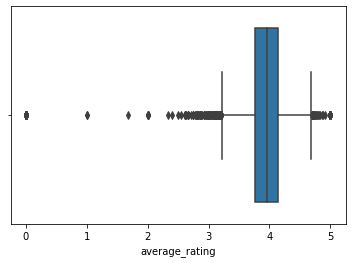

In [442]:
# Check outliers in the column average_rating : no outliers
sns.boxplot(x=df['average_rating'])

<AxesSubplot:xlabel='num_pages'>

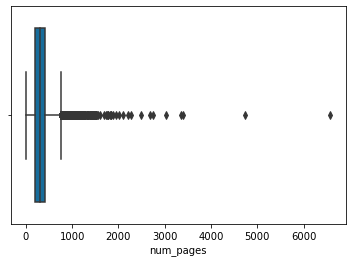

In [443]:
# Check outliers in the column num_pages 
sns.boxplot(x=df['num_pages'], palette='colorblind') 
# Remove outliers 

In [444]:
print(df['num_pages'].min())
print(df['num_pages'].max())

0
6576


<AxesSubplot:xlabel='num_pages'>

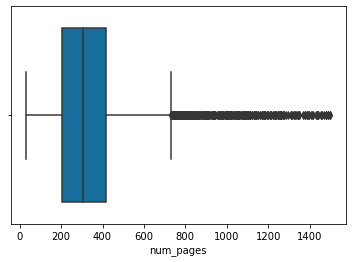

In [445]:
# Delete lignes where number of pages is less than 30 an more than 1500
# We assume this choice even if number of pages can be under 30 or over 1500
# <30 pages : we supose that most of them are Audio books, which only have the cover page or some decribtion
vmin = 30
vmax = 1500
column = 'num_pages'
df = df[df[column].between(vmin, vmax)]

sns.boxplot(x=df['num_pages'], palette='colorblind')
# Half of the books contain between 200 and 400 pages


Text(0, 0.5, 'Author')

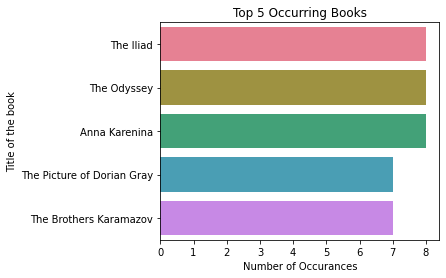

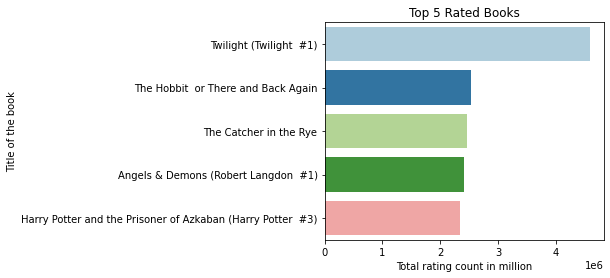

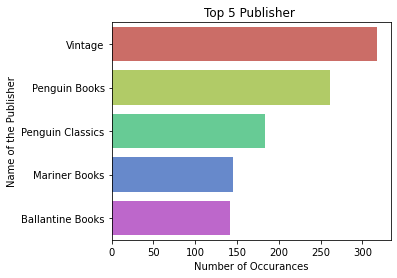

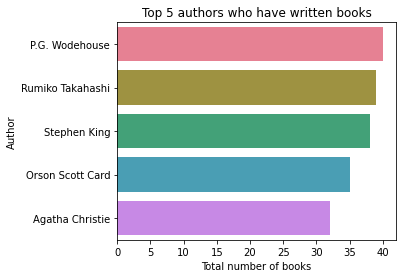

In [446]:
# Top 5 Books with most occurences 

plt.figure(figsize=(5,4))
books = df['title'].value_counts()[:5]
rating = df.average_rating[:5]
sns.barplot(x = books, y = books.index, palette='husl')
plt.title('Top 5 Occurring Books') 
plt.xlabel('Number of Occurances')
plt.ylabel('Title of the book')

# Top 5 rated books

plt.figure(figsize=(5,4))
rated = df.nlargest(5, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(x=rated, y=rated.index, palette='Paired')
plt.title('Top 5 Rated Books') 
plt.xlabel('Total rating count in million')
plt.ylabel('Title of the book')

# Top 5 Publisher 

plt.figure(figsize=(5,4))
books = df['publisher'].value_counts()[:5]
rating = df.average_rating[:5]
sns.barplot(x = books, y = books.index, palette='hls')
plt.title('Top 5 Publisher ') 
plt.xlabel('Number of Occurances')
plt.ylabel('Name of the Publisher')

# Top 5 authors who have written the most books

plt.figure(figsize=(5,4))
nb_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(5).set_index('authors')
sns.barplot(x=nb_books['title'],y= nb_books.index, palette='husl')
plt.title("Top 5 authors who have written books")
plt.xlabel('Total number of books')
plt.ylabel('Author')

In [447]:
print(df.loc[df.bookID == 31373, 'publication_date'])
print(df.loc[df.bookID == 45531, 'publication_date'])

8177   1999-01-01
Name: publication_date, dtype: datetime64[ns]
11094   1975-01-01
Name: publication_date, dtype: datetime64[ns]


# Part 2 : Engineering

In [448]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

- Extraction of the year of publication in a new column 

In [449]:
# We create a new column with year of publication only 
df['year'] = pd.DatetimeIndex(df['publication_date']).year 

- Add a new feature which has the number of occurrences of each book

In [450]:
# We use the function groupby
df['num_occ'] = df.groupby('title')['title'].transform('count')

- Encoding of the language_code column renamed to language, deletion of under-represented languages

In [451]:
df['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [452]:
# We change the name of the language_code column to language
df.rename(columns={'language_code':'language'}, inplace=True)

In [453]:
# Harmonize language codes
encoding = {'language': {'eng': 'English', 'en-US': 'English', 'en-GB': 'English', 'en-CA': 'English',
                             'fre': 'French',
                             'spa': 'Spanish',
                             'mul': 'Not referenced in list of country codes',
                             'grc': 'Greek',
                             'enm': 'Not referenced in list of country codes',
                             'ger': 'German',
                             'jpn': 'Japanese',
                             'ara': 'Not referenced in list of country codes',
                             'nl': 'Dutch',
                             'zho': 'Not referenced in list of country codes',
                             'lat': 'Latvian',
                             'por': 'Portugese',
                             'srp': 'Not referenced in list of country codes',
                             'ita': 'Italian',
                             'rus': 'Russian',
                             'msa': 'Not referenced in list of country codes',
                             'glg': 'Not referenced in list of country codes',
                             'wel': 'Not referenced in list of country codes',
                             'swe': 'Swedish',
                             'nor': 'Norwegian',
                             'tur': 'Turkish',
                             'gla': 'Not referenced in list of country codes',
                             'ale': 'Not referenced in list of country codes'
                             }}                   
df.replace(encoding, inplace = True)

In [454]:
df['language'].value_counts()

English                                    10210
Spanish                                      214
French                                       143
German                                        97
Japanese                                      46
Not referenced in list of country codes       43
Greek                                         11
Portugese                                     10
Italian                                        5
Latvian                                        3
Russian                                        2
Swedish                                        2
Dutch                                          1
Norwegian                                      1
Turkish                                        1
Name: language, dtype: int64

In [455]:
# We do not keep underrepresented languages because they do not allow reliable correlations or prediction
df = df.loc[df['language'].isin(['English','Spanish','French','German'])]

- Pie plot of our new language column with book languages in percentage

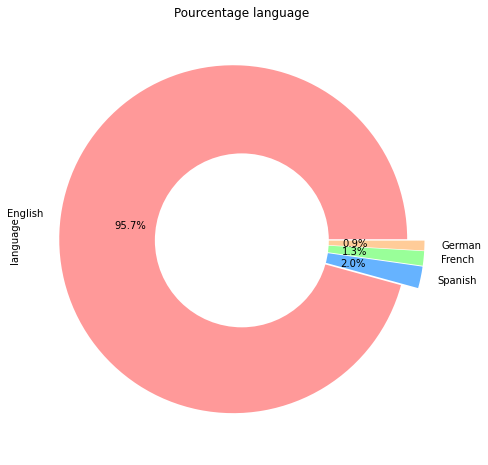

In [456]:
# Graph of our new dataframe with book languages ​​in percentagecolors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05)
df['language'].value_counts().plot(kind='pie', figsize=(8,8),colors =colors, explode= explode, title="Pourcentage language", autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

- Scatter plot : text_review_count and year

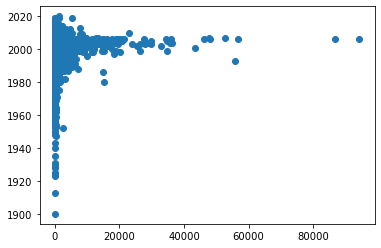

In [457]:
# We notice that it is rather recent books that have a lot of comments
# Probably due to the rise of the internet
plt.scatter(df["text_reviews_count"],df["year"])

- Creation of categorical columns (text) : average_rating_cat, num_pages_cat, year_cat

- Creation of categorical columns (integer): average_rating_cat_num, num_pages_cat_num, year_cat_num


In [458]:
# We create an extra categorical column for average_rating : categorical and numerical
slots = ["Rather Disappointed","Rather Interesting"]
bins = [-1,3.8,6]
df['average_rating_cat'] = pd.cut(df['average_rating'], bins, labels=slots)

In [459]:
slots = [0,1]
bins = [-1,3.8,6]
df['average_rating_cat_num'] = pd.cut(df['average_rating'], bins, labels=slots)
df['average_rating_cat_num'] = pd.to_numeric(df['average_rating_cat_num'])

In [460]:
# We create an extra categorical column for num_pages : categorical and numerical

slots = ["small","large"]
bins = [29,500,1501]
df['num_pages_cat'] = pd.cut(df['num_pages'], bins, labels=slots)

In [461]:
slots = [1,2]
bins = [29,500,1501]
df['num_pages_cat_num'] = pd.cut(df['num_pages'], bins, labels=slots)
df['num_pages_cat_num'] = pd.to_numeric(df['num_pages_cat_num'])

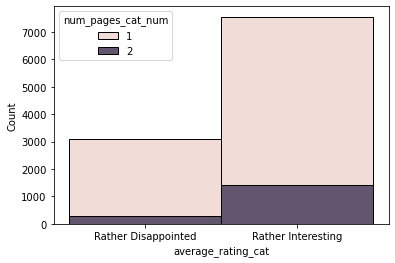

In [462]:
sns.histplot(x="average_rating_cat", hue="num_pages_cat_num", multiple="stack", data =df)
plt.show()

# We notice that books with more pages are better rated
# In order to better train our model, we will propose a feature encoding:
# Create three new columns for categories 1,2 and 3 of the number of pages
# We will make our predictions based on these two categories

In [463]:
# We create an extra categorical column for years : categorical and numerical

slots = ["Before 2000","After 2000"]
bins = [1899,2000,2021]
df['year_cat'] = pd.cut(df['year'], bins, labels=slots)

In [464]:
slots = [0,1]
bins = [1899,2000,2021]
df['year_cat_num'] = pd.cut(df['year'], bins, labels=slots)
df['year_cat_num'] = pd.to_numeric(df['year_cat_num'])

- Using sns and crosstab to make choice justification

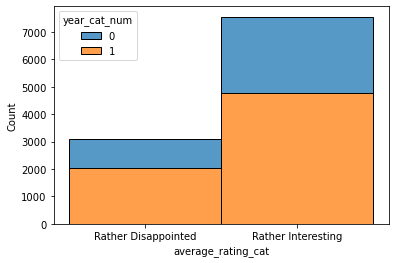

In [465]:
sns.histplot(x="average_rating_cat", hue="year_cat_num", multiple="stack", data =df)
plt.show()
# We will not make any further analysis on this category: no significant significant difference between before and after 2000.

In [466]:
# Allows us to realize how overrepresented books in English are
pd.crosstab(df['average_rating_cat'],df['language'], normalize='index')
# We do not want to make a prediction based on the language

language,English,French,German,Spanish
average_rating_cat,,,,
Rather Disappointed,0.957824,0.012234,0.009981,0.019961
Rather Interesting,0.957264,0.013893,0.008732,0.020111


- Correlation : we choose the one that seems to us the most striking : between average_rating and num_pages_cat_num

There is a slight correlation between average_rating_cat_num and num_pages_cat_num (0.124925)
Our objective in this part is to show that despite the weakness of our correlation we will succeed in making predictions.
We will have to admit that the predictions will not be excellent but we will see that depending on the preductive models we will be able to improve the accuracy and the precision of our predictions 

In [467]:
px.imshow(df.corr(),)

- Encoding : explicit the "num_pages_cat_num" column by converting it to 3 columns

In [468]:
# This is a way to explicit the "num_pages_cat_num" column by transforming it to 3 columns corresponding to each of its values
# This is known as encoding
df = pd.concat([df,pd.get_dummies(df.num_pages_cat_num)],axis=1).drop(columns="num_pages_cat_num")
df = df[['average_rating_cat_num','ratings_count','text_reviews_count','num_occ',1,2]]
df
# Here is the dataframe on which we will base our predictions. It consists of numerical and categorical variables

,average_rating_cat_num,ratings_count,text_reviews_count,num_occ,1,2
0,1,2095690,27591,2,0,1
1,1,2153167,29221,1,0,1
2,1,6333,244,2,1,0
3,1,2339585,36325,2,1,0
5,0,19,1,1,1,0
...,...,...,...,...,...,...
11118,1,156,20,1,0,1
11119,1,783,56,1,0,1
11120,1,820,95,1,1,0
11121,0,769,139,1,1,0


# PART 3 : Prediction

- Split the data into Train and Test

In [469]:
from sklearn.model_selection import train_test_split

In [470]:
df_train, df_test = train_test_split(df,test_size = 0.2)

In [471]:
# We have similar results which proves that our split is coherent 
print(df.text_reviews_count.mean())
print(df_train.text_reviews_count.mean())
print(df_test.text_reviews_count.mean())

563.4879969992498
576.0202789825343
513.3647444913267


In [472]:
df_train.columns

Index(['average_rating_cat_num',          'ratings_count',
           'text_reviews_count',                'num_occ',
                              1,                        2],
      dtype='object')

- Initialize and train the model

In [473]:
# Get the values of the columns for the training data
X_train = df_train.loc[:,['ratings_count','text_reviews_count','num_occ',1,2]].values
y_train = df_train.average_rating_cat_num.values

In [474]:
# Get the values of the columns for the test data
X_test = df_test.loc[:,['ratings_count','text_reviews_count','num_occ',1,2]].values
y_test = df_test.average_rating_cat_num.values

- First model : logistic regression

In [475]:
from sklearn.linear_model import LogisticRegression
# It is a binary logistic model.It models the probability of one event for the event be a linear combination of one or more independent variables
# Our predictors : ratings_count, text_reviews_count, num_occ, num_pages 1 and 2

In [476]:
# Here we initialize the model
lr_model = LogisticRegression(random_state=0,max_iter=1000)

In [477]:
# Here we train the model on the training data
lr_model.fit(X=X_train, y=y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [478]:
y_test_predicted = lr_model.predict(X_test)

In [479]:
y_test_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [480]:
y_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

- Evaluate the prediction

In [481]:
(y_test_predicted == y_test).sum()/len(y_test)

0.6962025316455697

In [482]:
# The score is not that good but it's a prediction
# It will not be effective if we have to predict a terrorist act but on our scale it is already an indicator
# We will use a logistic regression model in order to be able to compare our different models

In [483]:
from sklearn.metrics import confusion_matrix

In [484]:
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)

In [485]:
df['average_rating_cat_num'].value_counts()

1    7558
0    3106
Name: average_rating_cat_num, dtype: int64

In [486]:
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted)
cf

,y_test_0,y_test_1
y_pred_0,15,602
y_pred_1,46,1470


In [487]:
cf/len(y_test)

,y_test_0,y_test_1
y_pred_0,0.007032,0.282232
y_pred_1,0.021566,0.68917


In [488]:
from sklearn.metrics import recall_score, precision_score

In [489]:
recall_score(y_true=y_test, y_pred=y_test_predicted)

0.9696569920844327

In [490]:
precision_score(y_true=y_test, y_pred=y_test_predicted)

0.7094594594594594

In [491]:
from sklearn.metrics import classification_report

In [492]:
report =classification_report(y_true=y_test, y_pred=y_test_predicted)
print(report)

In [494]:
from sklearn.neural_network import MLPClassifier

In [495]:
# Try a new classifier: Multi-Layer Perceptron classifier

nn_model = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000)

In [496]:
nn_model.fit(X=X_train,y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)

In [497]:
y_test_predicted_nn = nn_model.predict(X_test)

In [498]:
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=y_test)

In [499]:
report_nn

'              precision    recall  f1-score   support\n\n           0       0.34      0.13      0.19       617\n           1       0.72      0.90      0.80      1516\n\n    accuracy                           0.68      2133\n   macro avg       0.53      0.51      0.49      2133\nweighted avg       0.61      0.68      0.62      2133\n'

In [500]:
# Decision tree are model than we can both use for regression and classification
from sklearn.tree import DecisionTreeClassifier

In [501]:
# Try a Decision Tree classifier
dt_model = DecisionTreeClassifier()

In [502]:
dt_model.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

In [503]:
y_test_predicted_dt = dt_model.predict(X_test)

In [504]:
report_dt = classification_report(y_pred=y_test_predicted_dt,y_true=y_test)

In [505]:
report_dt

'              precision    recall  f1-score   support\n\n           0       0.33      0.34      0.33       617\n           1       0.73      0.72      0.72      1516\n\n    accuracy                           0.61      2133\n   macro avg       0.53      0.53      0.53      2133\nweighted avg       0.61      0.61      0.61      2133\n'

- Compare different models

In [506]:
from sklearn.ensemble import RandomForestClassifier

In [507]:
# Try an ensemble classifier: Random Forest
rf_model = RandomForestClassifier()

In [508]:
rf_model.fit(X=X_train,y=y_train)

RandomForestClassifier()

In [509]:
y_test_predicted_rf = rf_model.predict(X_test)

In [510]:
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=y_test)

In [511]:
print("Report of logistic regression")
print(report)

Report of logistic regression
              precision    recall  f1-score   support

           0       0.25      0.02      0.04       617
           1       0.71      0.97      0.82      1516

    accuracy                           0.70      2133
   macro avg       0.48      0.50      0.43      2133
weighted avg       0.58      0.70      0.60      2133



In [ ]:
# With logistic regression we have the best results to predict the 1 but we have the worst to predict the 0. 

In [512]:
print("Report of MLP model")
print(report_nn)

Report of MLP model
              precision    recall  f1-score   support

           0       0.34      0.13      0.19       617
           1       0.72      0.90      0.80      1516

    accuracy                           0.68      2133
   macro avg       0.53      0.51      0.49      2133
weighted avg       0.61      0.68      0.62      2133



In [ ]:
# With neural network we don't have pretty good results

In [513]:
print("Report of Decision Tree classifier model")
print(report_dt)

Report of Decision Tree classifier model
              precision    recall  f1-score   support

           0       0.33      0.34      0.33       617
           1       0.73      0.72      0.72      1516

    accuracy                           0.61      2133
   macro avg       0.53      0.53      0.53      2133
weighted avg       0.61      0.61      0.61      2133



In [ ]:
# With the decision tree we have the best results to predict the 0 compare to other model but it' bad for predict 1.

In [515]:
print("Report of Random Forest model")
print(report_rf)

Report of Random Forest model
              precision    recall  f1-score   support

           0       0.32      0.23      0.27       617
           1       0.72      0.80      0.76      1516

    accuracy                           0.63      2133
   macro avg       0.52      0.51      0.51      2133
weighted avg       0.60      0.63      0.61      2133



In [ ]:
# With Random Forest it is not enough: neither for the 0 neither for the 1

To conclude : 
    
Concerning the models, it is necessary to distinguish between the prediction of 0s and 1s, that is to say books which have rather disappointed readers from books which have rather satisfied readers.
Our different models have a much better ability to predict 1s than 0s.
In addition, the results must be weighted:
There is more data concerning the 1s so on average this will pull up the result of our predictions. Hence the importance of distinguishing between 0, 1, precision, recall, f1-score and support.

When we evaluate our model in the classification task we have to think about many things : choice of features / Dataset (cleaning) / model / model parmeters

Then the question is where we can improve the dataset, the model ?
Do not hesitate to do retro engineering to get better performance.
For the moment we did a lot and had relevant result so we will not do retro engineering.

For further we could add a new category of appreciation of the books or change the limit of our actual categories
